In [1]:
# Dependencies
import pandas as pd
import requests
import json
import os
import csv
import prettyprint as pp
import matplotlib.pyplot as plt

# Google developer API key
from config import gkey

In [2]:
world_happiness = "Selected_cities_2020.csv"
location_types = "Location_Types.csv"
world_happiness_df = pd.read_csv(world_happiness, encoding="UTF-8")
location_types_df = pd.read_csv(location_types, encoding="UTF-8")
 # base url
places_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

In [3]:
location_types = "location_types.csv"
location_types_df = pd.read_csv(location_types, encoding="UTF-8")
location_types_df.head()

,location_types,sub_type
0,library,Education
1,museum,Education
2,primary_school,Education
3,school,Education
4,secondary_school,Education


In [4]:
transportation_location_types = location_types_df.loc[location_types_df["sub_type"]
                                               =="Transportation",:]
transportation_types_list = []
transportation_location_types.reset_index(inplace=True)
for i in range(len(transportation_location_types)):
    transportation_types_list.append(transportation_location_types.loc[i,"location_types"])

transportation_types_list

['airport',
 'bus_station',
 'light_rail_station',
 'subway_station',
 'train_station',
 'transit_station']

In [5]:
base_url = "https://maps.googleapis.com/maps/api/geocode/json"
coord=[]
cities=["Helsinki","Stockholm","Washington D.C.","Brussels","Montevideo","Bucharest","Islamabad","Accra","Bhagdad","Kampala","Gaborone"]
for city in cities:
    params = {"address": city, "key":gkey}
    response = requests.get(base_url, params=params)
    places_data = response.json()   
    lat=places_data["results"][0]["geometry"]["location"]["lat"]
    long=places_data["results"][0]["geometry"]["location"]["lng"]
    coord.append(f"{lat},{long}")
coord

['60.16985569999999,24.9383791',
 '59.32932349999999,18.0685808',
 '38.9071923,-77.0368707',
 '50.8503396,4.3517103',
 '-34.9011127,-56.16453139999999',
 '44.4267674,26.1025384',
 '33.6844202,73.04788479999999',
 '5.6037168,-0.1869644',
 '33.315241,44.3660671',
 '0.3475964,32.5825197',
 '-24.6282079,25.9231471']

In [6]:
# Use for Loop to calculate Airports

target_type ="airport"
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
count_airports=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    response = requests.get(base_url, params=params)
    places_data = response.json()
    count_airports.append(len(places_data["results"]))
    
count_airports

[5, 10, 1, 4, 5, 2, 6, 5, 3, 2, 2]

In [8]:
# Use for Loop to calculate Bus Stations

target_type ="bus station"
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
count_bus_stations=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    response = requests.get(base_url, params=params)
    places_data = response.json()
    count_bus_stations.append(len(places_data["results"]))
    
count_bus_stations

[10, 10, 10, 10, 10, 10, 7, 0, 0, 2, 0]

In [9]:
# Use for Loop to calculate Light Rail Stations

target_type ="light rail station"
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
count_light_rail_stations=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    response = requests.get(base_url, params=params)
    places_data = response.json()
    count_light_rail_stations.append(len(places_data["results"]))
    
count_light_rail_stations

[10, 10, 10, 10, 10, 10, 0, 4, 1, 0, 1]

In [10]:
# Use for Loop to calculate Subway Stations

target_type ="subway station"
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
count_subway_stations=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    response = requests.get(base_url, params=params)
    places_data = response.json()
    count_subway_stations.append(len(places_data["results"]))
    
count_subway_stations

[7, 7, 11, 8, 0, 3, 3, 0, 0, 0, 0]

In [11]:
# Use for Loop to calculate Train Stations

target_type ="train station"
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
count_train_stations=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    response = requests.get(base_url, params=params)
    places_data = response.json()
    count_train_stations.append(len(places_data["results"]))
    
count_train_stations

[10, 10, 5, 10, 1, 10, 0, 0, 0, 0, 0]

In [13]:
# Use for Loop to calculate Transit Stations

target_type ="transit station"
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
count_transit_stations=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    response = requests.get(base_url, params=params)
    places_data = response.json()
    count_transit_stations.append(len(places_data["results"]))
    
count_transit_stations

[10, 10, 10, 10, 10, 10, 0, 0, 0, 3, 1]

In [14]:
transportation_dict = {"Cities":cities,"Airports":count_airports,"Bus Stations":count_bus_stations,"Light Rail Stations":count_light_rail_stations,
              "Subway Stations":count_subway_stations,"Train Stations":count_train_stations, "Transit Stations":count_transit_stations}

transportation_data_df = pd.DataFrame(transportation_dict)
transportation_data_df

,Cities,Airports,Bus Stations,Light Rail Stations,Subway Stations,Train Stations,Transit Stations
0,Helsinki,5,10,10,7,10,10
1,Stockholm,10,10,10,7,10,10
2,Washington D.C.,1,10,10,11,5,10
3,Brussels,4,10,10,8,10,10
4,Montevideo,5,10,10,0,1,10
5,Bucharest,2,10,10,3,10,10
6,Islamabad,6,7,0,3,0,0
7,Accra,5,0,4,0,0,0
8,Bhagdad,3,0,1,0,0,0
9,Kampala,2,2,0,0,0,3


In [15]:
#sum the totals of each row
sum_rows= transportation_data_df.sum(axis=1)

In [16]:
#Add to dataframe
transportation_data_df["Total"]=sum_rows
transportation_data_df

,Cities,Airports,Bus Stations,Light Rail Stations,Subway Stations,Train Stations,Transit Stations,Total
0,Helsinki,5,10,10,7,10,10,52
1,Stockholm,10,10,10,7,10,10,57
2,Washington D.C.,1,10,10,11,5,10,47
3,Brussels,4,10,10,8,10,10,52
4,Montevideo,5,10,10,0,1,10,36
5,Bucharest,2,10,10,3,10,10,45
6,Islamabad,6,7,0,3,0,0,16
7,Accra,5,0,4,0,0,0,9
8,Bhagdad,3,0,1,0,0,0,4
9,Kampala,2,2,0,0,0,3,7


Text(0, 0.5, 'Score')

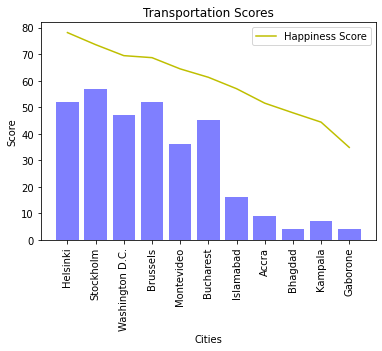

In [19]:
transportation_score = transportation_data_df["Total"]
x_cities = transportation_data_df["Cities"]
happiness_score = world_happiness_df["Ladder score"]
plt.bar(x_cities,transportation_score,color="b",alpha=0.5,align="center")
plt.plot(x_cities,happiness_score,color="y",label="Happiness Score")
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.title("Transportation Scores")
plt.xlabel("Cities")
plt.ylabel("Score")